In [27]:
import importlib

In [28]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
import GMN
importlib.reload(GMN)
from GMN import GenerativeNetworkModel

In [29]:
num_nodes = 100
num_seed_edges = 250

In [30]:
seed_adjacency_matrix = torch.zeros(num_nodes, num_nodes)
# Randomly select seed edges
seed_edge_indices = torch.randint(0, num_nodes, (num_seed_edges, 2))
seed_adjacency_matrix[seed_edge_indices[:, 0], seed_edge_indices[:, 1]] = 1
seed_adjacency_matrix[seed_edge_indices[:, 1], seed_edge_indices[:, 0]] = 1
# Remove diagonals
seed_adjacency_matrix.fill_diagonal_(0)

# Set the distance matrix to all ones
distance_matrix = torch.ones(num_nodes, num_nodes)
distance_matrix.fill_diagonal_(0)

# Set other parameters
eta = 1
gamma = 1
distance_relationship_type = "exponential"
matching_relationship_type = "exponential"

In [43]:
gmn = GenerativeNetworkModel(seed_adjacency_matrix = seed_adjacency_matrix,
                distance_matrix = distance_matrix,
                eta = eta,
                gamma = gamma,
                distance_relationship_type = distance_relationship_type,
                matching_relationship_type = matching_relationship_type,
                alpha = 0.01, 
                optimisation_criterion_kwargs = {"omega":1},
                optimisation_normalisation=False
)

Optimisation criterion was unspecified. Defaulting to 'distance_weighted_communicability'.
Weight lower bound was unspecified. Defaulting to 0.0.
Weight upper bound was unspecified. Defaulting to infinity.


In [44]:
added_edges_list, adjacency_snapshot, weight_snapshots = gmn.train_loop(num_iterations = 10000, binary_updates_per_iteration=0, weighted_updates_per_iteration=1) 

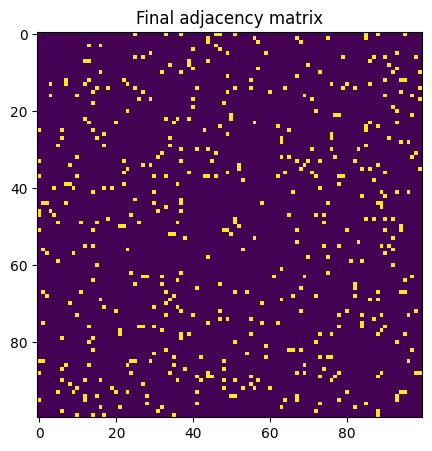

In [45]:
plt.figure(figsize=(5, 5))
plt.imshow(gmn.adjacency_matrix.numpy())
plt.title("Final adjacency matrix")
plt.show()

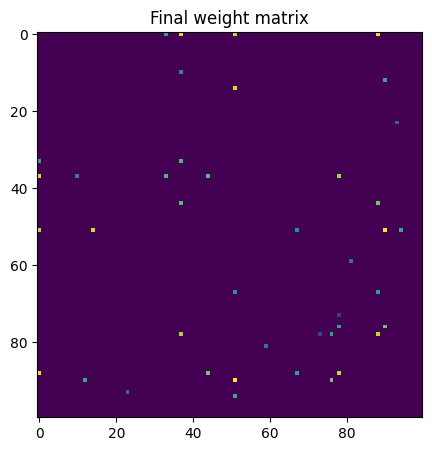

In [47]:
plt.figure(figsize=(5, 5))
plt.imshow(gmn.weight_matrix.detach().numpy())
plt.title("Final weight matrix")
plt.show()


In [48]:
W = gmn.weight_matrix.detach().numpy()
W.max()

np.float32(4.707494)